In [67]:
import numpy as np

In [68]:
from scipy.integrate import odeint

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
[]


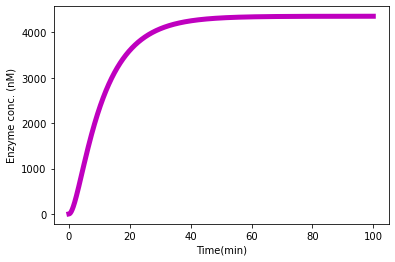

In [92]:
# INDUCTION OF IPTG AT t = 0:


# INTIAL CONDITIONS:
# RNAP mRNA ~ 1 - 10 (4600 / 540)(4600(2000 - 10000) - Bakshi S, Siryaporn A, Goulian M, Weisshaar JC. Superresolution imaging of ribosomes and RNA polymerase in live Escherichia coli cells. Mol Microbiol. 2012 Jul85(1):21-38. doi: 10.1111/j.1365-2958.2012.08081.x. p.26 right column top paragraphPubMed ID22624875)
                      #540 being the protein to mRNA ratio
                          
#Total RNAP = (1500 - 11400) - X. Sunney Xie, Paul J. Choi, Gene-Wei Li, Nam Ki Lee, and Giuseppe Lia, 'Single-Molecule Approach to Molecular Biology in Living Bacterial Cells', Annu. Rev. Biophys. 2008. 37:p.419PubMed ID18573089
#           = 4600(2000 - 10000) - Bakshi S, Siryaporn A, Goulian M, Weisshaar JC. Superresolution imaging of ribosomes and RNA polymerase in live Escherichia coli cells. Mol Microbiol. 2012 Jul85(1):21-38. doi: 10.1111/j.1365-2958.2012.08081.x. p.26 right column top paragraphPubMed ID22624875
#True value  = 400, as there are 5- 20 RNAP per LAC induced gene, since we have 40 plasmid (taking 10 RNAP) we have = 10*40 = 400 RNAP (X. Sunney Xie, Paul J. Choi, Gene-Wei Li, Nam Ki Lee, and Giuseppe Lia, 'Single-Molecule Approach to Molecular Biology in Living Bacterial Cells', Annu. Rev. Biophys. 2008. 37:p.419PubMed ID18573089)

#LacI mRNA = (10 - 30) - X. Sunney Xie, Paul J. Choi, Gene-Wei Li, Nam Ki Lee, and Giuseppe Lia, 'Single-Molecule Approach to Molecular Biology in Living Bacterial Cells', Annu. Rev. Biophys. 2008. 37:p.419PubMed ID18573089
#             as there are 10000 LacZ molecules and protein/mRNA ratio is 540(see bionumbers) therefore ~18 molecules of LacZ mRNA must be there, which is accurate as per paper
#             so by same logic there must be 0.018 molecules of LacI mRNA as there are only 10 in a cell..which is not possible so we take LacI mRNA per moleculea = 1
#True value = 1

#LacI = 10 molecules per cell - Kalisky T, Dekel E, Alon U. Cost-benefit theory and optimal design of gene regulation functions. Phys Biol. 2007 Nov 7 4(4):229-45. p.239 table

#LacI dimer = 0 (initially)

#Total OE = 40 (EQUAL TO COPY NUMBER)-https://ecoliwiki.org/colipedia/index.php/pET-28a(%2B)

#O_E occupied by repressor protein = 38 (95% of total OE)

#I_extracellular ~ 10000 (calculated)

# I intracelluar = 0 (t = 0)

# I2RE2 = 0 (t= 0)

# mRNA of Y = (after induction) 10 - 30 (X. Sunney Xie, Paul J. Choi, Gene-Wei Li, Nam Ki Lee, and Giuseppe Lia, 'Single-Molecule Approach to Molecular Biology in Living Bacterial Cells', Annu. Rev. Biophys. 2008. 37:p.419PubMed ID18573089)

#LacY = 0 (before induction)

#desired enzyme mRNA = 0

#desired enzyme = 0

import matplotlib.pyplot as plt
alpha_MR = 0.23
lamda_MR = 0.462 
beta_R = 15 
k_2R = 50
k_n2R = 10**-3 
lamda_R = 0.2
k_R = 960
k_nR = 2.4
k_dr1 = 3* 10**(-7)
k_ndr1 =12 
lamda_R2 = 0.2
k_dr2 = 3* 10**(-7)
k_ndr2 = 4.8 * 10**-3
k_ft = 6 * 10**4
k_t = 0.92
lamda_I2R2 =0.2 
alpha_0 = 3.066 * 10**-23
alpha_1 = 0.5
lamda_MY = 0.462
beta_Y = 30
k_np =0.1 
k_p = 0.12
lamda_Y = 0.2
lamda_Ylex = 0.2
lamda_MT7 = 0.462 
beta_T7 = 6.116
lamda_pT7 = 0.2
n = 2
k_d = 3
alpha_MT = 0.5
alpha_leak = 3.066 * 10**-23
lamda_MF = 0.462
beta_F = 10.063
lamda_F = 0.1
tf = 100
dt=0.001

t = np.arange(0,tf,dt)
def dD(D,tm):
    Da,Db,Dc,Dd,De,Df,Dg,Dh,Di,Dj,Dk,Dl,Dm = D
    d1 = alpha_MR*40 - lamda_MR*Da
    d2 = beta_R*Da - 2*k_2R*(Db)**2 + 2*k_n2R*Dc-lamda_R*Db
    d3 = 2*k_2R*(Da)**2 - 2*k_n2R*Dc-k_R*Dc*Dd+ k_nR*(40 - Dd)- k_dr1*Dc*(De)**2 + k_ndr1*Df-lamda_R2*Dc
    d4 = -k_R*Dc*Dd+k_nR*(40-Dd)+k_dr2*(40-Dd)*(De)**2-k_ndr2*Dd*Df
    d5 = (-2*k_dr1*Dc*(De)**2+ 2*k_ndr1*Df-2*k_dr2*(40- Dd)*(De)**2+2*k_ndr2*Dd*Df+k_ft*Di+k_t*(10**4-De)+2*lamda_I2R2*Df)
    d6 = k_dr1*Dc*(De)**2 - k_ndr1*Df+k_dr2*(40-Dd)*(De)**2-k_ndr2*Dd*Df-lamda_I2R2*Df
    d7 = alpha_0*(40-Dd)+alpha_1*Dd-lamda_MY*Dg
    d8 = beta_Y*Dg+(k_ft +k_np)*Di-k_p*Dh*10**4-lamda_Y*Dh
    d9 = -(k_ft+k_np)*Di+k_p*Dh*10**4-lamda_Ylex*Di
    d10= alpha_0*(40-Dd)+alpha_1*Dd-lamda_MT7*Dj
    d11=beta_T7*Dj-lamda_pT7*Dk
    d12= (((Dk)**n/((Dk)**n + (k_d)**n))*alpha_MT + alpha_leak)*40 - lamda_MF*Dl
    d13= beta_F*Dl-lamda_F*Dm
    
    return[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13]
D = odeint(dD,[1,10,0,38,0,0,20,0,0,1,400,0,0],t)
Da=D[:,0]
Db=D[:,1]
Dc=D[:,2]
Dd=D[:,3]
De=D[:,4]
Df=D[:,5]
Dg=D[:,6]
Dh=D[:,7]
Di= D[:,8]
Dj=D[:,9]
Dk=D[:,10]
Dl=D[:,11]
Dm=D[:,12]

plt.plot(t,Dm,linewidth = 5,color = 'm')
plt.xlabel('Time(min)')
plt.ylabel('Enzyme conc. (nM)')
from scipy.signal import find_peaks
peaks = find_peaks(Dm,height = 1)
print(peaks)
height = peaks[1]['peak_heights']
print(height)

UsageError: Line magic function `%` not found.
